<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Введение:" data-toc-modified-id="Введение:-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Введение:</a></span><ul class="toc-item"><li><span><a href="#Загрузка-данных-и-подготовка-их-к-анализу" data-toc-modified-id="Загрузка-данных-и-подготовка-их-к-анализу-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка данных и подготовка их к анализу</a></span></li><li><span><a href="#Выввод" data-toc-modified-id="Выввод-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Выввод</a></span></li></ul></li><li><span><a href="#Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии" data-toc-modified-id="Функции-для-расчета-и-анализа-LTV,-ROI,-удержания-и-конверсии-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Функции для расчета и анализа LTV, ROI, удержания и конверсии</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Профили-пользователей" data-toc-modified-id="Профили-пользователей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Профили пользователей</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Маркетинг" data-toc-modified-id="Маркетинг-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Маркетинг</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Оценка-окупаемости-рекламы-для-привлечения-пользователей" data-toc-modified-id="Оценка-окупаемости-рекламы-для-привлечения-пользователей-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Оценка окупаемости рекламы для привлечения пользователей</a></span><ul class="toc-item"><li><span><a href="#Динамика-удержания-и-конверсия-пользователей-из-США" data-toc-modified-id="Динамика-удержания-и-конверсия-пользователей-из-США-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Динамика удержания и конверсия пользователей из США</a></span></li></ul></li><li><span><a href="#Вывод" data-toc-modified-id="Вывод-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Вывод</a></span></li><li><span><a href="#Дополненный-Вывод" data-toc-modified-id="Дополненный-Вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Дополненный Вывод</a></span></li></ul></div>

## Введение:

В этом проекте мы - маркетинговый аналитик развлекательного приложения Procrastinate Pro+. Несколько прошлых месяцев наш бизнес постоянно нес убытки - в привлечение пользователей была вложена куча денег, а толку никакого. Нам нужно разобраться в причинах этой ситуации.

У нас в распоряжении есть лог сервера с данными о посещениях приложения новыми пользователями, зарегистрировавшимися в период с 2019-05-01 по 2019-10-27, выгрузка их покупок за этот период, а также статистика рекламных расходов. Нам предстоит изучить, как люди пользуются продуктом, когда они начинают покупать, сколько денег приносит каждый клиент, когда он окупается и какие факторы отричательно влияют на привлечение пользователей.

Описание данных
Таблица visits_log_short (лог сервера с информацией о посещениях сайта):

    User Id — уникальный идентификатор пользователя
    Device — категория устройства пользователя
    Session start — дата и время начала сессии
    Session End — дата и время окончания сессии
    Channel — идентификатор рекламного источника, из которого пришел пользователь
    Region - страна пользователя

Таблица orders_log_short (информация о заказах):

    User Id — уникальный id пользователя, который сделал заказ
    Event Dt — дата и время покупки
    Revenue — выручка

Таблица costs_short (информация о затратах на маркетинг):

    Channel — идентификатор рекламного источника
    Dt — дата
    Costs — затраты на этот рекламный источник в этот день

###  Загрузка данных и подготовка их к анализу
Загрузим данные о визитах, заказах и расходах в переменные. Оптимизируем данные для анализа. Убедимся, что тип данных в каждой колонке — правильный и дополнительно проверим данные на дубликаты.

In [1]:
#Загружаем полезные стандартные библиотеки
import pandas as pd 
from pymystem3 import Mystem
m = Mystem() 
from datetime import datetime, timedelta
import numpy as np
import seaborn as sns
pd.set_option('display.max_columns', None)
from scipy import stats as st
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os

In [3]:
pth1 = '/datasets/visits_info_short.csv'
pth2 = '/datasets/orders_info_short.csv'
pth3 = '/datasets/costs_info_short.csv'
if os.path.exists(pth1) and os.path.exists(pth2) and os.path.exists(pth3):
    users = pd.read_csv(pth1)  # лог сервера с информацией о посещениях сайта
    orders = pd.read_csv(pth2)  # информация о заказах
    ad_costs = pd.read_csv(pth3)
else:
    print('Ничего не получилось =(')

In [4]:
try:
    users = pd.read_csv('1')  # лог сервера с информацией о посещениях сайта
    orders = pd.read_csv('2')  # информация о заказах
    ad_costs = pd.read_csv('3') # информация о затратах на маркетинг
except:
    print('Ничего не получилось =(')

Ничего не получилось =(


In [5]:
users = pd.read_csv('/datasets/visits_info_short.csv')  # лог сервера с информацией о посещениях сайта
orders = pd.read_csv('/datasets/orders_info_short.csv')  # информация о заказах
ad_costs = pd.read_csv('/datasets/costs_info_short.csv') # информация о затратах на маркетинг

Приведем датасет users в порядок:
1. Переведем все в змеиный регистр
2. Переведем даты в нужный нам формат 

In [6]:
users.columns 

Index(['User Id', 'Region', 'Device', 'Channel', 'Session Start',
       'Session End'],
      dtype='object')

In [7]:
# Старый код
#users.rename(columns={'User Id': 'user_id', 'Session Start': 'session_start',
#'Session End': 'session_end'}, inplace=True)

#Новый код
users.columns = users.columns.str.lower().str.replace(' ', '_')
users['session_start'] = pd.to_datetime(users['session_start'])
users['session_end'] = pd.to_datetime(users['session_end'])
users.head(2)

,user_id,region,device,channel,session_start,session_end
0,981449118918,United States,iPhone,organic,2019-05-01 02:36:01,2019-05-01 02:45:01
1,278965908054,United States,iPhone,organic,2019-05-01 04:46:31,2019-05-01 04:47:35


In [8]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
user_id          309901 non-null int64
region           309901 non-null object
device           309901 non-null object
channel          309901 non-null object
session_start    309901 non-null datetime64[ns]
session_end      309901 non-null datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [9]:
orders.columns

Index(['User Id', 'Event Dt', 'Revenue'], dtype='object')

Приведем датасет oders в порядок:
1. Переведем все в змеиный регистр
2. Переведем даты в нужный нам формат 

In [10]:
# Старый код
#orders.rename(columns={'User Id': 'user_id', 'Event Dt': 'event_dt', 'Revenue': 'revenue'}, inplace=True)

#Новый код
orders.columns = orders.columns.str.lower().str.replace(' ', '_')
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
orders.head(2)

,user_id,event_dt,revenue
0,188246423999,2019-05-01 23:09:52,4.99
1,174361394180,2019-05-01 12:24:04,4.99


In [11]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
user_id     40212 non-null int64
event_dt    40212 non-null datetime64[ns]
revenue     40212 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [12]:
ad_costs.columns

Index(['dt', 'Channel', 'costs'], dtype='object')

Приведем датасет ad_costs в порядок:
1. Переведем все в змеиный регистр
2. Переведем даты в нужный нам формат 

In [13]:
#Старый код
#ad_costs.rename(columns={'Channel': 'channel'}, inplace=True)

#Новый код
ad_costs.columns = ad_costs.columns.str.lower()
ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
ad_costs.head(2)

,dt,channel,costs
0,2019-05-01,FaceBoom,113.3
1,2019-05-02,FaceBoom,78.1


In [14]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
dt         1800 non-null datetime64[ns]
channel    1800 non-null object
costs      1800 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


In [15]:
# Проверим на дубликаты
print('Кол-во дубликтов в логе сервера с информацией о посещениях сайта - ',users.duplicated().sum())
print('Кол-во дубликтов в информации о заказах - ',orders.duplicated().sum())
print('Кол-во дубликтов в информации о затратах на маркетинг - ',ad_costs.duplicated().sum())

Кол-во дубликтов в логе сервера с информацией о посещениях сайта -  0
Кол-во дубликтов в информации о заказах -  0
Кол-во дубликтов в информации о затратах на маркетинг -  0


### Выввод
Нам были предоставлены 3 датасета. Мы подредактировали тиы данных, чтобы они удовлетворяли наши требования. Дубликатов не обнаружено. Данные готовы для дальнейшей обработки и анализа.


##  Функции для расчета и анализа LTV, ROI, удержания и конверсии

Нам разрешено использовать функции, которые мы проходили в спринте. Также позаимствуем функцию для создания профилей пользователей.

In [16]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        result = result.fillna(0).cumsum(axis=1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )
        roi = result.div(cac['cac'], axis=0)
        roi = roi[~roi['cohort_size'].isin([np.inf])]
        roi['cohort_size'] = cohort_sizes
        roi['cac'] = cac['cac']
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]
        return result, roi

    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )
    if 'cohort' in dimensions:
        dimensions = []
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [17]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [18]:
events = None
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )
    profiles['dt'] = profiles['first_ts'].dt.date.astype('datetime64[ns]')
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [19]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [20]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

In [21]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [22]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [23]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [24]:
prof = get_profiles(users, orders, events, ad_costs) #Проверим

In [25]:
prof[prof['acquisition_cost']>0]

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
7,46006712,2019-06-30 03:46:29,AdNonSense,Android,France,2019-06-30,2019-06-01,True,1.008000
...,...,...,...,...,...,...,...,...,...
149999,999942424543,2019-05-24 21:03:26,TipTop,iPhone,United States,2019-05-24,2019-05-01,False,1.900000
150001,999949280903,2019-08-12 06:47:27,FaceBoom,Mac,United States,2019-08-12,2019-08-01,False,1.117838
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000


In [26]:
prof

,user_id,first_ts,channel,device,region,dt,month,payer,acquisition_cost
0,599326,2019-05-07 20:58:57,FaceBoom,Mac,United States,2019-05-07,2019-05-01,True,1.088172
1,4919697,2019-07-09 12:46:07,FaceBoom,iPhone,United States,2019-07-09,2019-07-01,False,1.107237
2,6085896,2019-10-01 09:58:33,organic,iPhone,France,2019-10-01,2019-10-01,False,0.000000
3,22593348,2019-08-22 21:35:48,AdNonSense,PC,Germany,2019-08-22,2019-08-01,False,0.988235
4,31989216,2019-10-02 00:07:44,YRabbit,iPhone,United States,2019-10-02,2019-10-01,False,0.230769
...,...,...,...,...,...,...,...,...,...
150003,999956196527,2019-09-28 08:33:02,TipTop,iPhone,United States,2019-09-28,2019-09-01,False,3.500000
150004,999975439887,2019-10-21 00:35:17,organic,PC,UK,2019-10-21,2019-10-01,False,0.000000
150005,999976332130,2019-07-23 02:57:06,TipTop,iPhone,United States,2019-07-23,2019-07-01,False,2.600000
150006,999979924135,2019-09-28 21:28:09,MediaTornado,PC,United States,2019-09-28,2019-09-01,False,0.205714


### Вывод
Мы скопировали функции и проверили их работоспособность. Все работает отлично!

## Профили пользователей

In [27]:
print ('Минимальная дата привлечения пользователей', prof['dt'].dt.date.min())
print ('Максимальная дата привлечения пользователей', prof['dt'].dt.date.max())

Минимальная дата привлечения пользователей 2019-05-01
Максимальная дата привлечения пользователей 2019-10-27


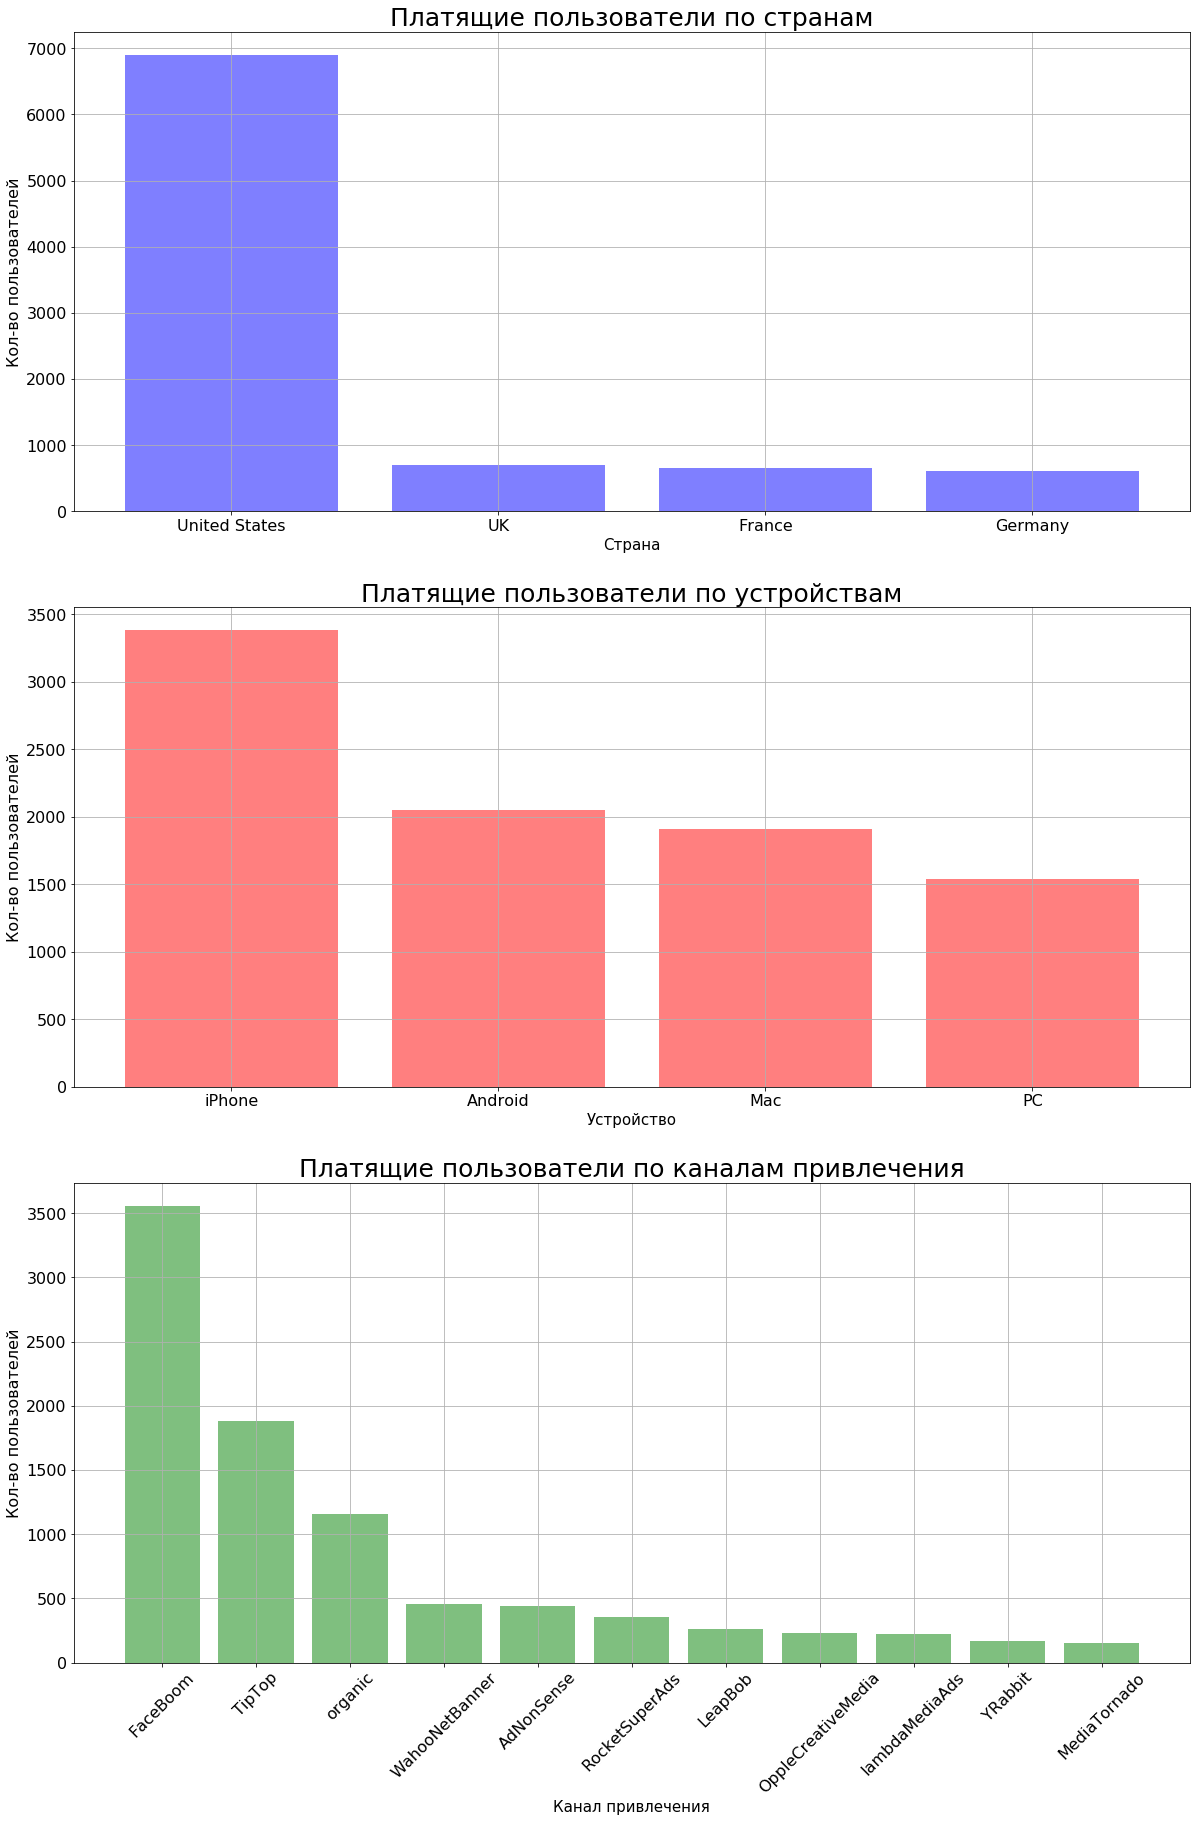

In [28]:
payer_country = prof[prof.payer == True].\
                groupby('region').agg({'payer':'count'}).\
                sort_values(by='payer', ascending=False).\
                reset_index()
payer_device = prof[prof.payer == True].\
                groupby('device').agg({'payer':'count'}).\
                sort_values(by='payer', ascending=False).\
                reset_index()
payer_channel = prof[prof.payer == True].\
                groupby('channel').agg({'payer':'count'}).\
                sort_values(by='payer', ascending=False).\
                reset_index()
fig, ax = plt.subplots(3, 1)
ax[0].bar(payer_country['region'],payer_country['payer'], color = 'blue', alpha = 0.5)
ax[0].set_title('Платящие пользователи по странам',fontsize = 25)
ax[0].set_xlabel('Страна',fontsize = 15)
ax[0].set_ylabel('Кол-во пользователей',fontsize = 16)
ax[0].grid()
ax[0].figsize = (6,6)
ax[0].tick_params(axis='both', which='major', labelsize=16)

ax[1].bar(payer_device['device'],payer_device['payer'], color = 'red', alpha = 0.5)
ax[1].set_title('Платящие пользователи по устройствам',fontsize = 25)
ax[1].set_xlabel('Устройство',fontsize = 15)
ax[1].set_ylabel('Кол-во пользователей',fontsize = 16)
ax[1].grid()
ax[1].figsize = (6,6)
ax[1].tick_params(axis='both', which='major', labelsize=16)

ax[2].bar(payer_channel['channel'],payer_channel['payer'], color = 'green', alpha = 0.5)
ax[2].set_title('Платящие пользователи по каналам привлечения',fontsize = 25)
ax[2].set_xlabel('Канал привлечения',fontsize = 15)
ax[2].set_ylabel('Кол-во пользователей',fontsize = 16)
ax[2].grid()
ax[2].figsize = (6,6)
ax[2].tick_params(axis='x', labelrotation = 45)
ax[2].tick_params(axis='both', which='major', labelsize=16)

fig.set_figwidth(20)
fig.set_figheight(30)

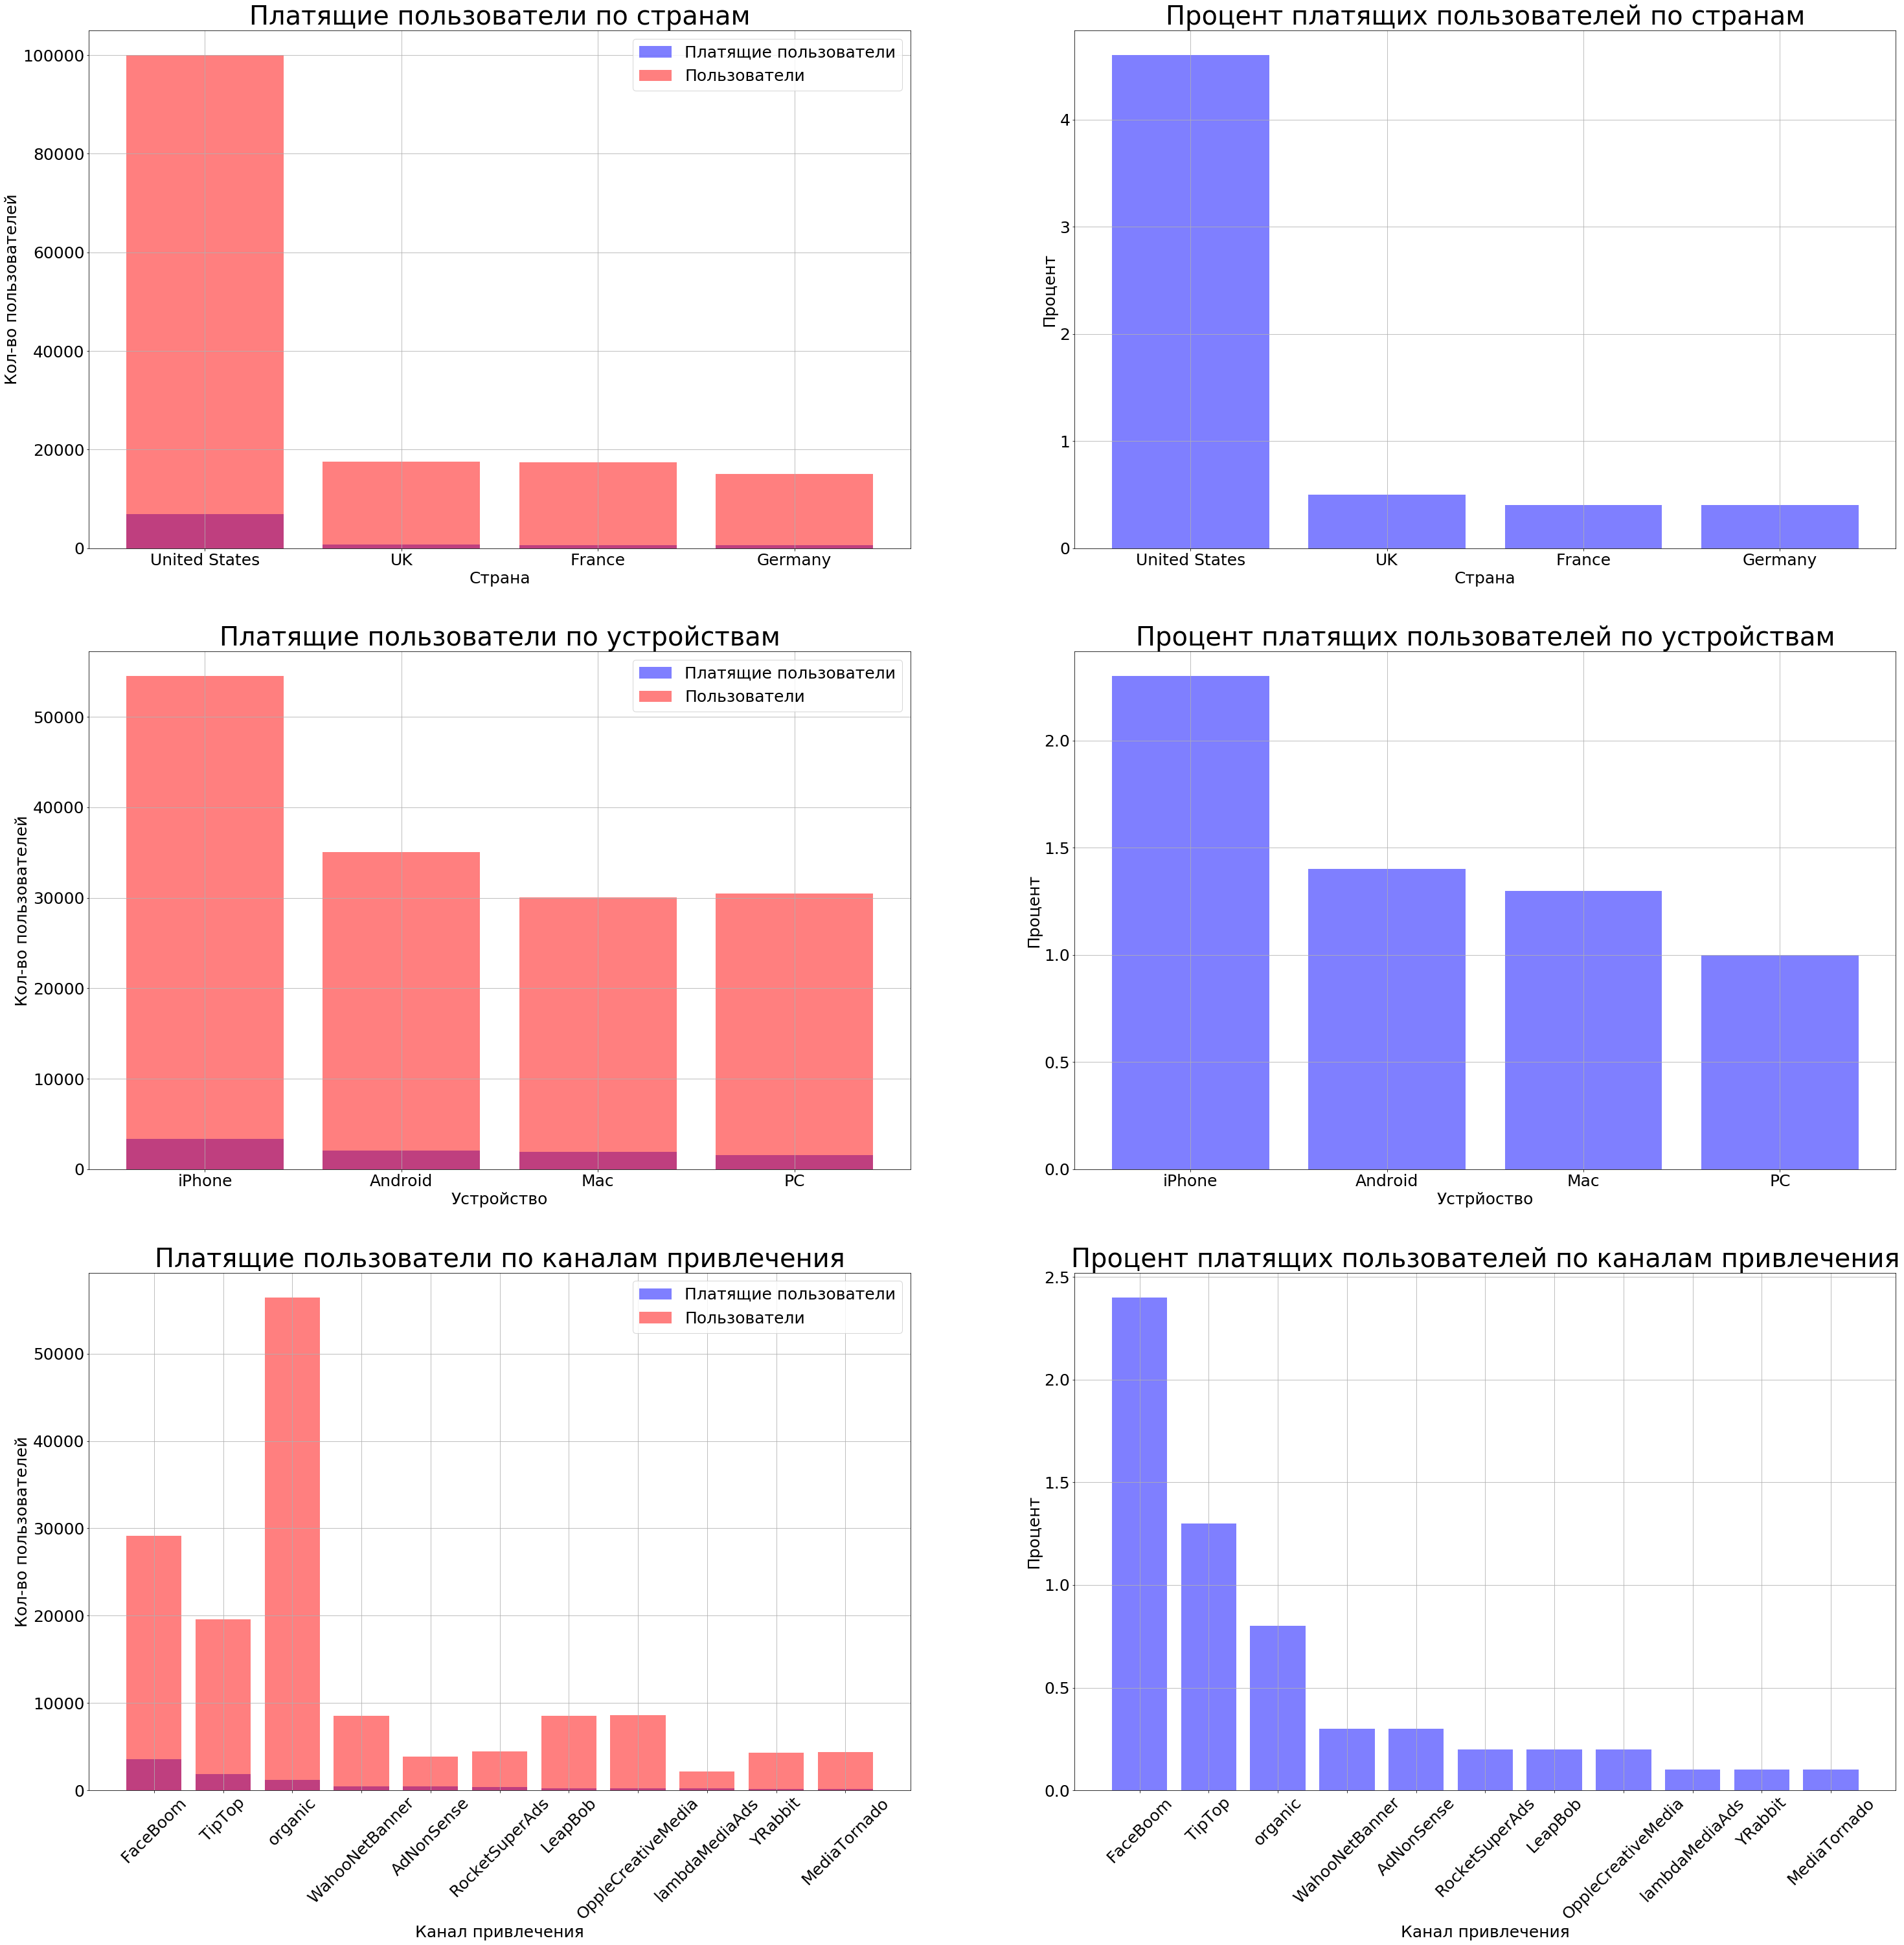

In [29]:
sum_payer = prof['payer'].count()
new_payer_country = prof.\
                groupby('region').agg({'user_id':'count','payer':'sum'}).\
                sort_values(by='payer', ascending=False).\
                rename(columns={'user_id': 'Пользователи','payer': 'Платящие пользователи'}).\
                reset_index()
new_payer_country['% платящих'] = (new_payer_country['Платящие пользователи'] / sum_payer * 100).round(1)
new_payer_device = prof.\
                groupby('device').agg({'user_id':'count','payer':'sum'}).\
                sort_values(by='payer', ascending=False).\
                rename(columns={'user_id': 'Пользователи','payer': 'Платящие пользователи'}).\
                reset_index()
new_payer_device['% платящих'] = (new_payer_device['Платящие пользователи'] / sum_payer * 100).round(1)
new_payer_channel = prof.\
                groupby('channel').agg({'user_id':'count','payer':'sum'}).\
                sort_values(by='payer', ascending=False).\
                rename(columns={'user_id': 'Пользователи','payer': 'Платящие пользователи'}).\
                reset_index()
new_payer_channel['% платящих'] = (new_payer_channel['Платящие пользователи'] / sum_payer * 100).round(1)
new_payer_country
fig, ax = plt.subplots(3, 2)
ax[0,0].bar(new_payer_country['region'],new_payer_country['Платящие пользователи'], color = 'blue', alpha = 0.5,
            label='Платящие пользователи')
ax[0,0].bar(new_payer_country['region'],new_payer_country['Пользователи'], color = 'red', alpha = 0.5,label='Пользователи')
ax[0,0].set_title('Платящие пользователи по странам',fontsize = 40)
ax[0,0].set_xlabel('Страна',fontsize = 25)
ax[0,0].set_ylabel('Кол-во пользователей',fontsize = 25)
ax[0,0].grid()
ax[0,0].legend(fontsize = 25)
ax[0,0].figsize = (10,10)
ax[0,0].tick_params(axis='both', which='major', labelsize=25)

ax[0,1].bar(new_payer_country['region'],new_payer_country['% платящих'], color = 'blue', alpha = 0.5)
ax[0,1].set_title('Процент платящих пользователей по странам',fontsize = 40)
ax[0,1].set_xlabel('Страна',fontsize = 25)
ax[0,1].set_ylabel('Процент',fontsize = 25)
ax[0,1].grid()
ax[0,1].figsize = (10,10)
ax[0,1].tick_params(axis='both', which='major', labelsize=25)

ax[1,0].bar(new_payer_device['device'],new_payer_device['Платящие пользователи'], color = 'blue', alpha = 0.5,
            label='Платящие пользователи')
ax[1,0].bar(new_payer_device['device'],new_payer_device['Пользователи'], color = 'red', alpha = 0.5,label='Пользователи')
ax[1,0].set_title('Платящие пользователи по устройствам',fontsize = 40)
ax[1,0].set_xlabel('Устройство',fontsize = 25)
ax[1,0].set_ylabel('Кол-во пользователей',fontsize = 25)
ax[1,0].grid()
ax[1,0].legend(fontsize = 25)
ax[1,0].figsize = (10,10)
ax[1,0].tick_params(axis='both', which='major', labelsize=25)

ax[1,1].bar(new_payer_device['device'],new_payer_device['% платящих'], color = 'blue', alpha = 0.5)
ax[1,1].set_title('Процент платящих пользователей по устройствам',fontsize = 40)
ax[1,1].set_xlabel('Устрйоство',fontsize = 25)
ax[1,1].set_ylabel('Процент',fontsize = 25)
ax[1,1].grid()
ax[1,1].figsize = (10,10)
ax[1,1].tick_params(axis='both', which='major', labelsize=25)

ax[2,0].bar(new_payer_channel['channel'],new_payer_channel['Платящие пользователи'], color = 'blue', alpha = 0.5,
            label='Платящие пользователи')
ax[2,0].bar(new_payer_channel['channel'],new_payer_channel['Пользователи'], color = 'red', alpha = 0.5, label='Пользователи')
ax[2,0].set_title('Платящие пользователи по каналам привлечения',fontsize = 40)
ax[2,0].set_xlabel('Канал привлечения',fontsize = 25)
ax[2,0].set_ylabel('Кол-во пользователей',fontsize = 25)
ax[2,0].grid()
ax[2,0].legend(fontsize = 25)
ax[2,0].figsize = (10,10)
ax[2,0].tick_params(axis='both', which='major', labelsize=25)
ax[2,0].tick_params(axis='x', labelrotation = 45,labelsize=25)

ax[2,1].bar(new_payer_channel['channel'],new_payer_channel['% платящих'], color = 'blue', alpha = 0.5)
ax[2,1].set_title('Процент платящих пользователей по каналам привлечения',fontsize = 40)
ax[2,1].set_xlabel('Канал привлечения',fontsize = 25)
ax[2,1].set_ylabel('Процент',fontsize = 25)
ax[2,1].grid()
ax[2,1].figsize = (10,10)
ax[2,1].tick_params(axis='both', which='major', labelsize=25)
ax[2,1].tick_params(axis='x', labelrotation = 45,labelsize=25)


fig.set_figwidth(50)
fig.set_figheight(50)

In [30]:
new_payer_channel

,channel,Пользователи,Платящие пользователи,% платящих
0,FaceBoom,29144,3557.0,2.4
1,TipTop,19561,1878.0,1.3
2,organic,56439,1160.0,0.8
3,WahooNetBanner,8553,453.0,0.3
4,AdNonSense,3880,440.0,0.3
5,RocketSuperAds,4448,352.0,0.2
6,LeapBob,8553,262.0,0.2
7,OppleCreativeMedia,8605,233.0,0.2
8,lambdaMediaAds,2149,225.0,0.1
9,YRabbit,4312,165.0,0.1


### Вывод 
Применив фунцию профилей пользователей мы получили следующую картину:
1. Больше платящих пользоватлей приходит из США, с айфонов, с рекламы от Faceboom.
2. Основываясь на вышесказанном можно предположить, что наш типичный покупатель молодые люди от 18-35 лет, так как устройствр iphone И Mac, в основном используют активные молодые люди. Так же стоит учитывать, откуда приходит основной приток поользоватлей: от Faceboom (аналог Facebook), а им как правило опять же прльззуются активные молодые люди.

## Маркетинг

Выясним:
- Сколько денег потратили? Всего / на каждый источник / по времени
- Сколько в среднем стоило привлечение одного покупателя из каждого источника?

In [31]:
print('Всего потратили денег',round(ad_costs.costs.sum()))

Всего потратили денег 105497


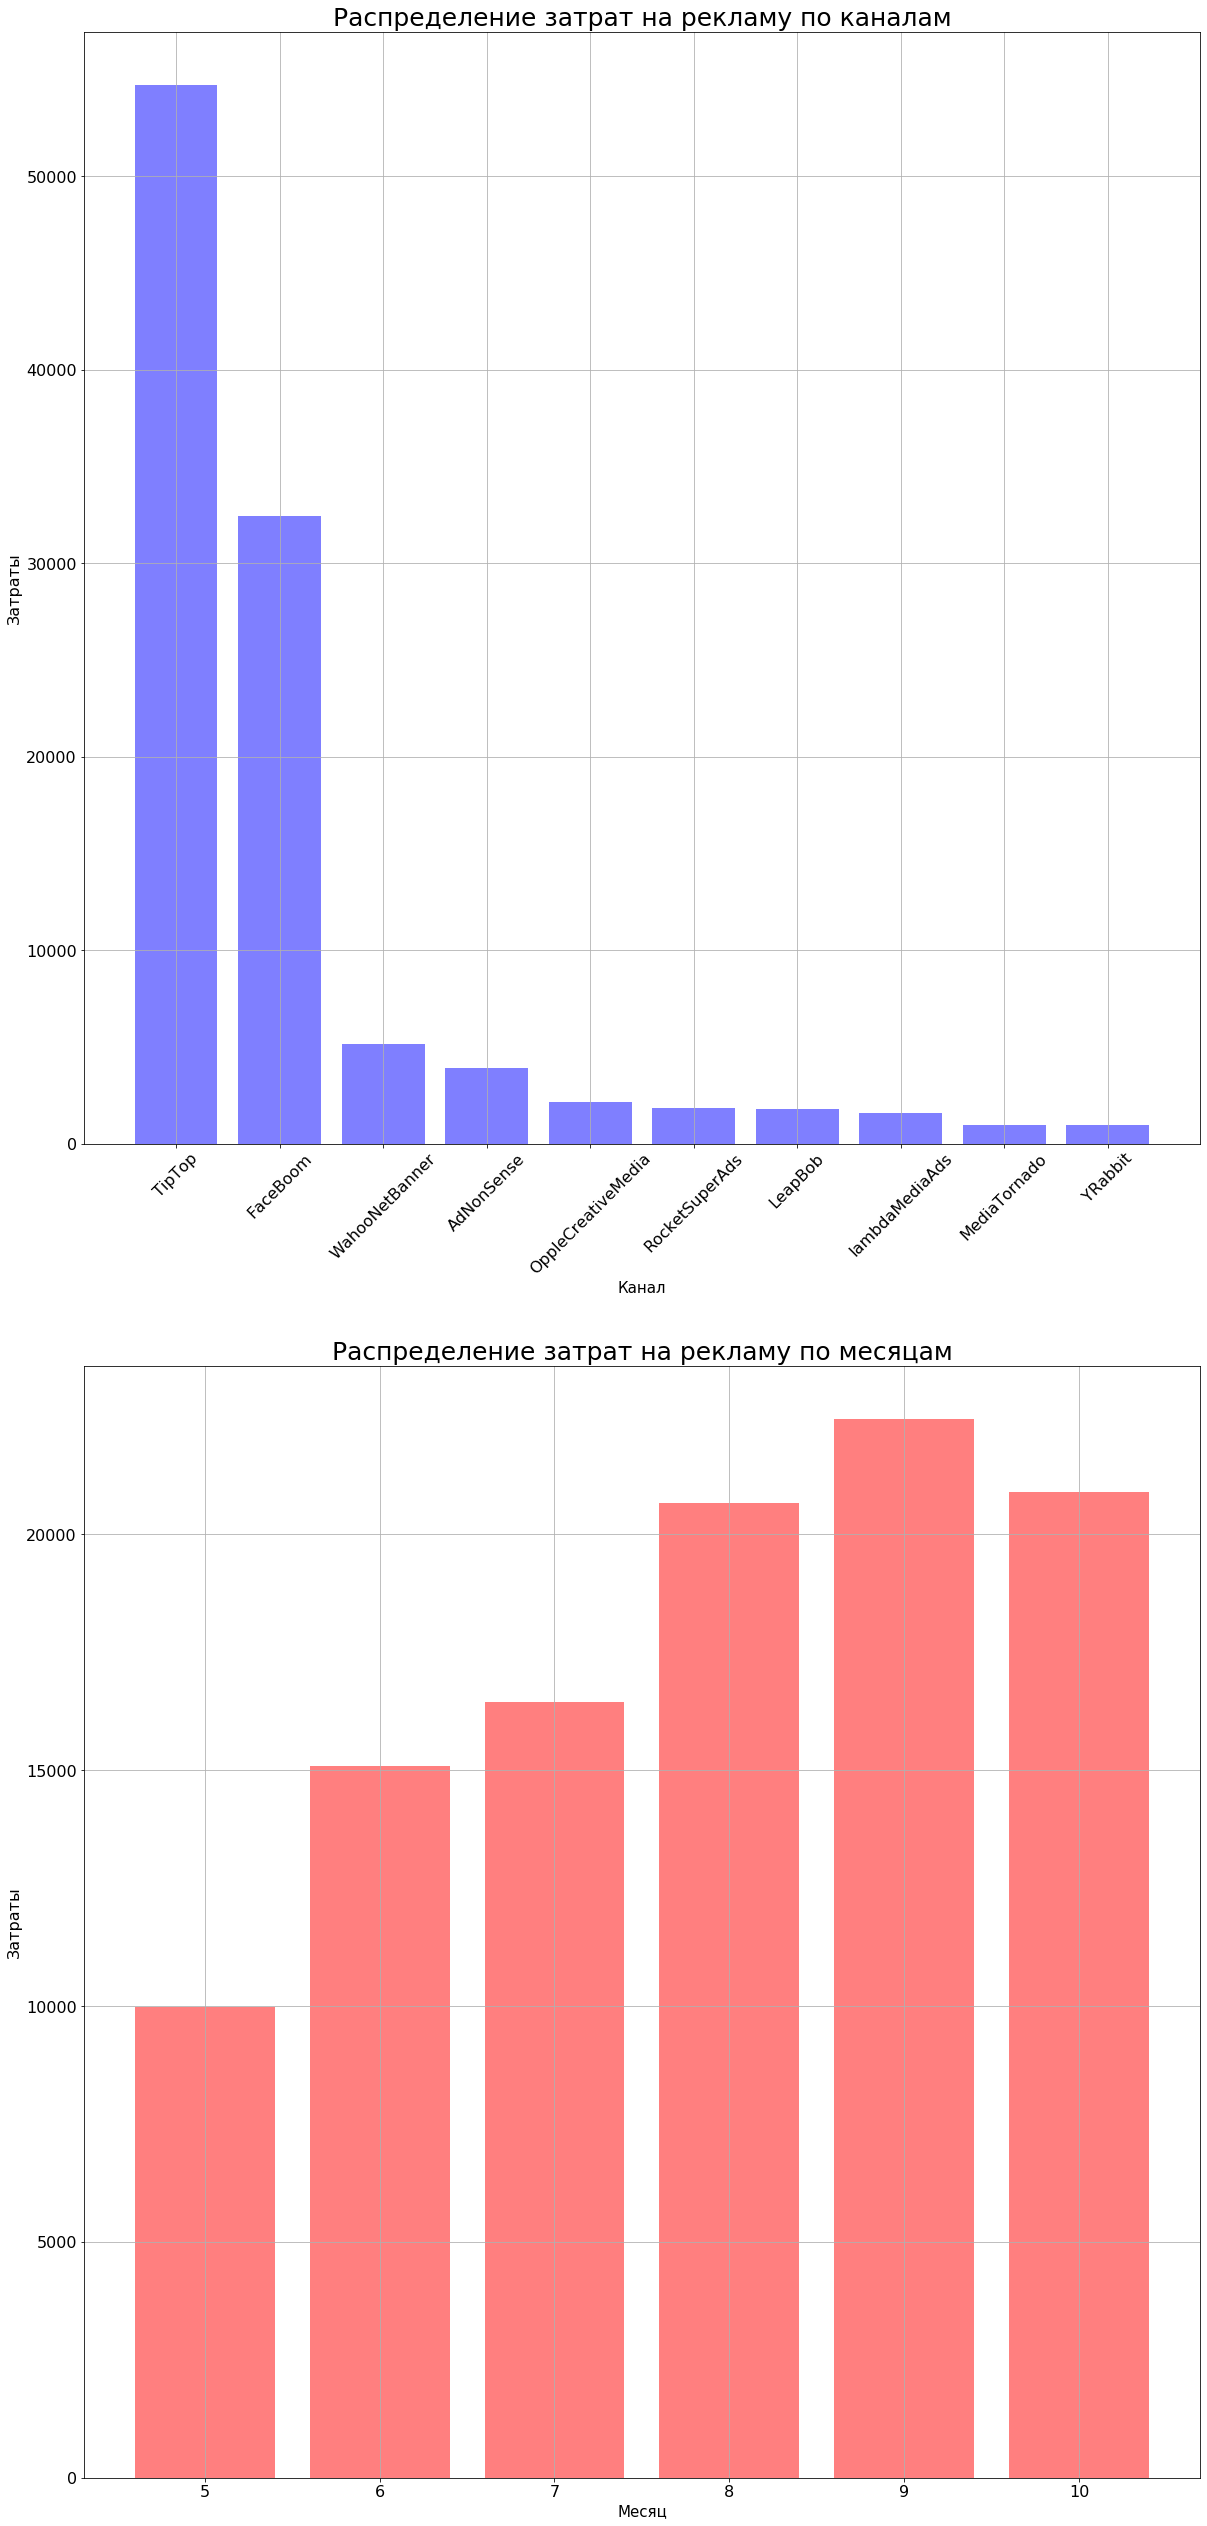

In [32]:
money_per_channel = ad_costs.groupby('channel').agg({'costs':'sum'})\
                    .sort_values(by='costs', ascending=False).reset_index()
money_per_month = ad_costs.copy(deep=True)
money_per_month['month'] = money_per_month['dt'].dt.month
money_per_month = money_per_month.groupby('month').agg({'costs':'sum'})\
                .reset_index()
fig, ax = plt.subplots(2, 1)
ax[0].bar(money_per_channel['channel'],money_per_channel['costs'], color = 'blue', alpha = 0.5)
ax[0].set_title('Распределение затрат на рекламу по каналам',fontsize = 25)
ax[0].set_xlabel('Канал',fontsize = 15)
ax[0].set_ylabel('Затраты',fontsize = 16)
ax[0].grid()
ax[0].figsize = (6,6)
ax[0].tick_params(axis='both', which='major', labelsize=16)
ax[0].tick_params(axis='x', labelrotation = 45)

ax[1].bar(money_per_month['month'],money_per_month['costs'], color = 'red', alpha = 0.5)
ax[1].set_title('Распределение затрат на рекламу по месяцам',fontsize = 25)
ax[1].set_xlabel('Месяц',fontsize = 15)
ax[1].set_ylabel('Затраты',fontsize = 16)
ax[1].grid()
ax[1].figsize = (6,6)
ax[1].tick_params(axis='both', which='major', labelsize=16)


fig.set_figwidth(20)
fig.set_figheight(45)

In [33]:
mean_acquisition = prof.groupby('channel').agg({'acquisition_cost':'mean'})\
                    .sort_values(by='acquisition_cost', ascending=False).reset_index()
mean_acquisition

,channel,acquisition_cost
0,TipTop,2.799003
1,FaceBoom,1.113286
2,AdNonSense,1.008054
3,lambdaMediaAds,0.724802
4,WahooNetBanner,0.602245
5,RocketSuperAds,0.412095
6,OppleCreativeMedia,0.250000
7,YRabbit,0.218975
8,MediaTornado,0.218717
9,LeapBob,0.210172


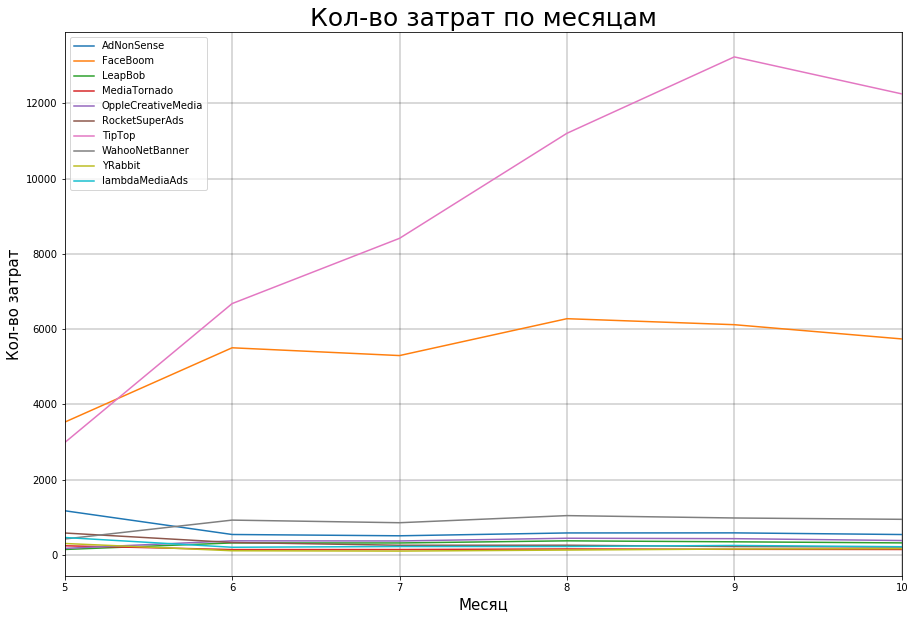

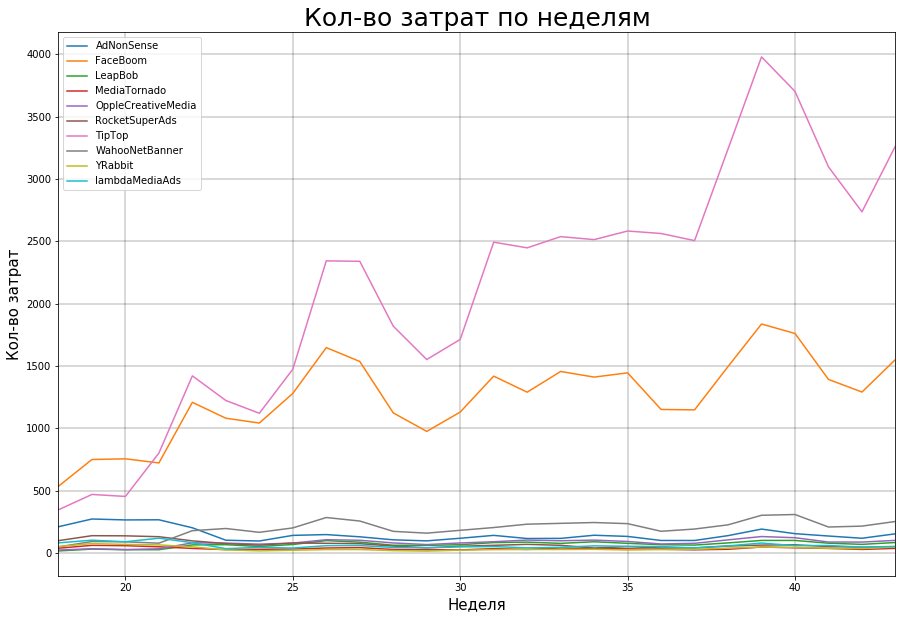

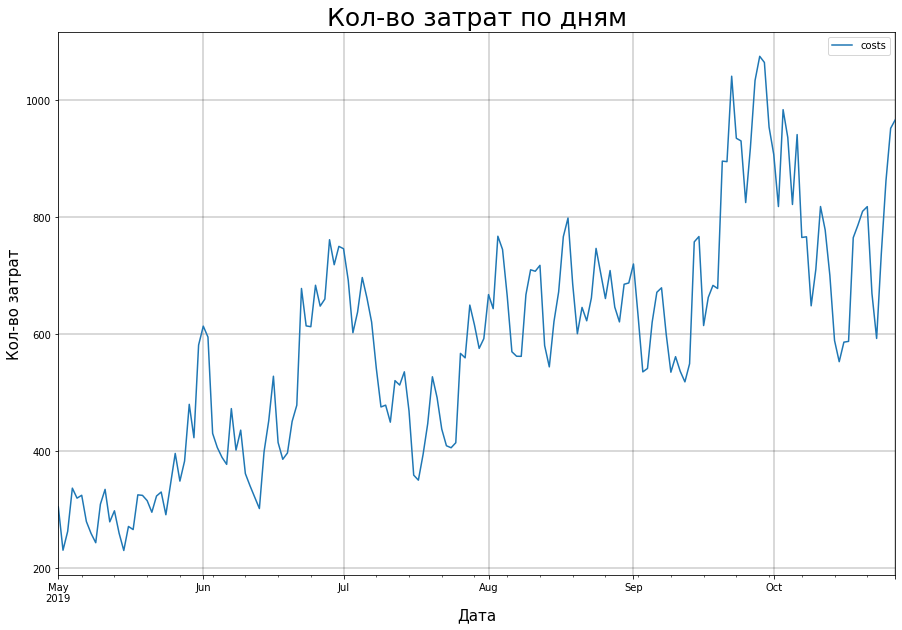

In [34]:
money_per_month = ad_costs.copy(deep=True)
money_per_month['month'] = money_per_month['dt'].dt.month
money_per_month['week'] = money_per_month['dt'].dt.week
money_per_month['date'] = money_per_month['dt'].dt.date

money_per_month_channel = pd.pivot_table(data=money_per_month,
               index='month',
               columns='channel',
               values = 'costs',
               aggfunc='sum')

money_per_week_channel = pd.pivot_table(data=money_per_month,
               index='week',
               columns='channel',
               values = 'costs',
               aggfunc='sum')

total_money_day = pd.pivot_table(data=money_per_month,
               index='dt',
               values = 'costs',
               aggfunc='sum')

fig1 = money_per_month_channel.plot(figsize = (15,10))
fig1.set_title('Кол-во затрат по месяцам',fontsize = 25)
fig1.set_xlabel('Месяц',fontsize = 15)
fig1.set_ylabel('Кол-во затрат',fontsize = 15)
fig1.legend()
fig1.grid(linewidth = 0.3, color = 'black')

fig2 = money_per_week_channel.plot(figsize = (15,10))
fig2.set_title('Кол-во затрат по неделям',fontsize = 25)
fig2.set_xlabel('Неделя',fontsize = 15)
fig2.set_ylabel('Кол-во затрат',fontsize = 15)
fig2.legend()
fig2.grid(linewidth = 0.3, color = 'black')


fig3 = total_money_day.plot(figsize = (15,10))
fig3.set_title('Кол-во затрат по дням',fontsize = 25)
fig3.set_xlabel('Дата',fontsize = 15)
fig3.set_ylabel('Кол-во затрат',fontsize = 15)
fig3.legend()
fig3.grid(linewidth = 0.3, color = 'black')

### Вывод
Всего было выделено на рекламу 105497$
Больше всего было потрачено на Рекламу Tip Top и Faceboom. Пик трат пришелся на сентябрь и это логично, так как сентябрь - конец летних каникул и отпусков и пора рабочей активности. Очень важно отметить, что цена привлечения пользователся от TipTop, но кол-во платящих пользователей от этого канала невелико и сопоставим с естественным притоком пользователей.

<div class="alert alert-info">
<b>Комментарий студента:</b> Сделал дополнительные расчеы и графики =)  </div>

<div class="alert alert-success">
<h2> Комментарий ревьюера: вторая итерация ревью <a class="tocSkip"> </h2>

<b>Все отлично!👍:</b> 
    
Все здорово, замечаний нет!🐱‍🏍
</div>

##  Оценка окупаемости рекламы для привлечения пользователей

С помощью LTV и ROI мы проанализируем
-  общую окупаемость рекламы;
-  окупаемость рекламы с разбивкой по устройствам;
-  окупаемость рекламы с разбивкой по странам;
-  окупаемость рекламы с разбивкой по рекламным каналам.

Опишите проблемы, которые вы обнаружили. Ответьте на вопросы:
- Окупается ли реклама, направленная на привлечение пользователей в целом? 
- Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
- Чем могут быть вызваны проблемы окупаемости? Изучите конверсию и удержание с разбивкой по устройствам, странам, рекламным каналам.

Опишите возможные причины обнаруженных проблем и сформируйте рекомендации для рекламного отдела. При решении этого шага считайте, что вы смотрите данные 1-го ноября 2019 года и что в вашей организации принято считать, что окупаемость должна наступать не позднее, чем через 2 недели после привлечения пользователей.

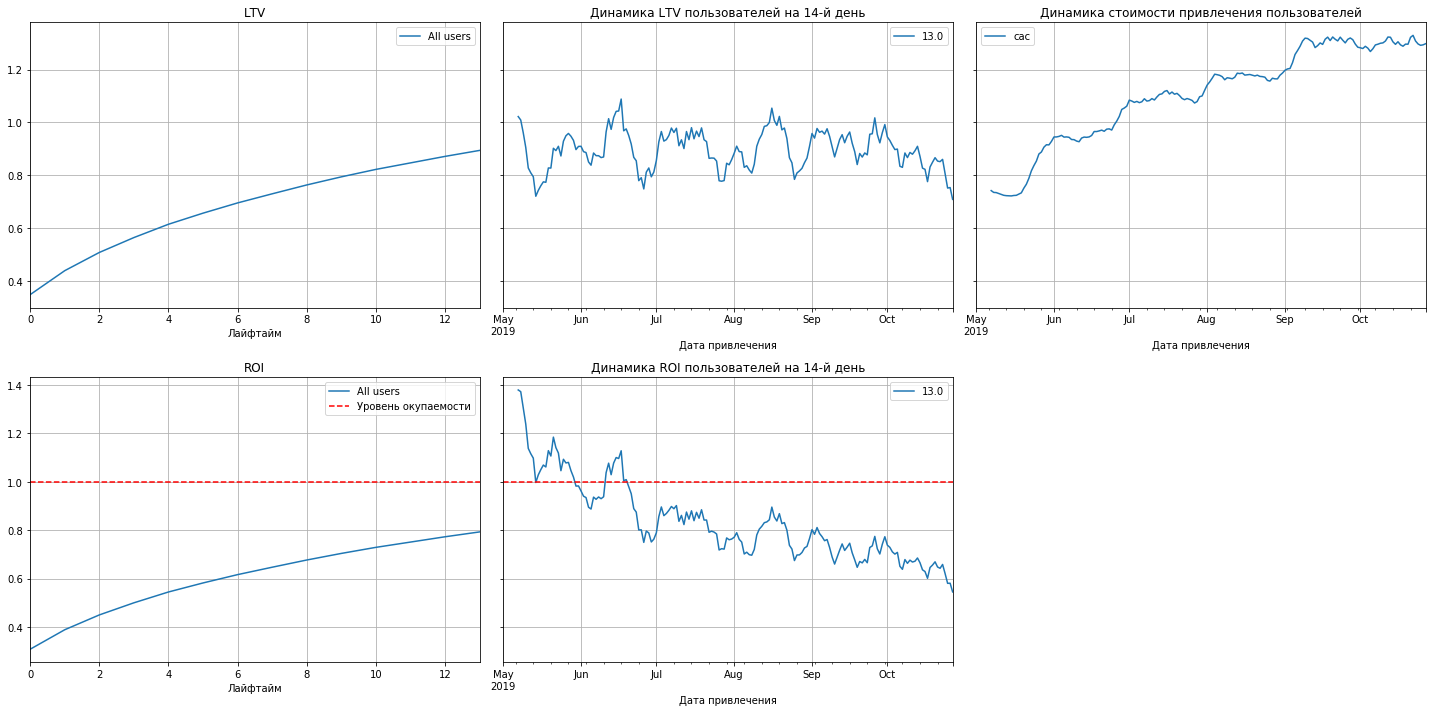

In [35]:
observation_date = datetime(2019, 11, 21).date()
horizon_days = 14
prof = prof.query('channel != "organic"')
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof, orders, observation_date, horizon_days
)
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 


<b>Новый вывод:</b> По графикам можно сделать такие выводы:    
1) Реклама не окупается. ROI в конце недели — около 80%.    
2) CAC Растет. Значит, дело может быть в увеличении рекламного бюджета.    
3) На LTV влияет сезонный фактор, и этот показатель достаточно стабилен. Значит, дело не в ухудшении качества пользователей.   

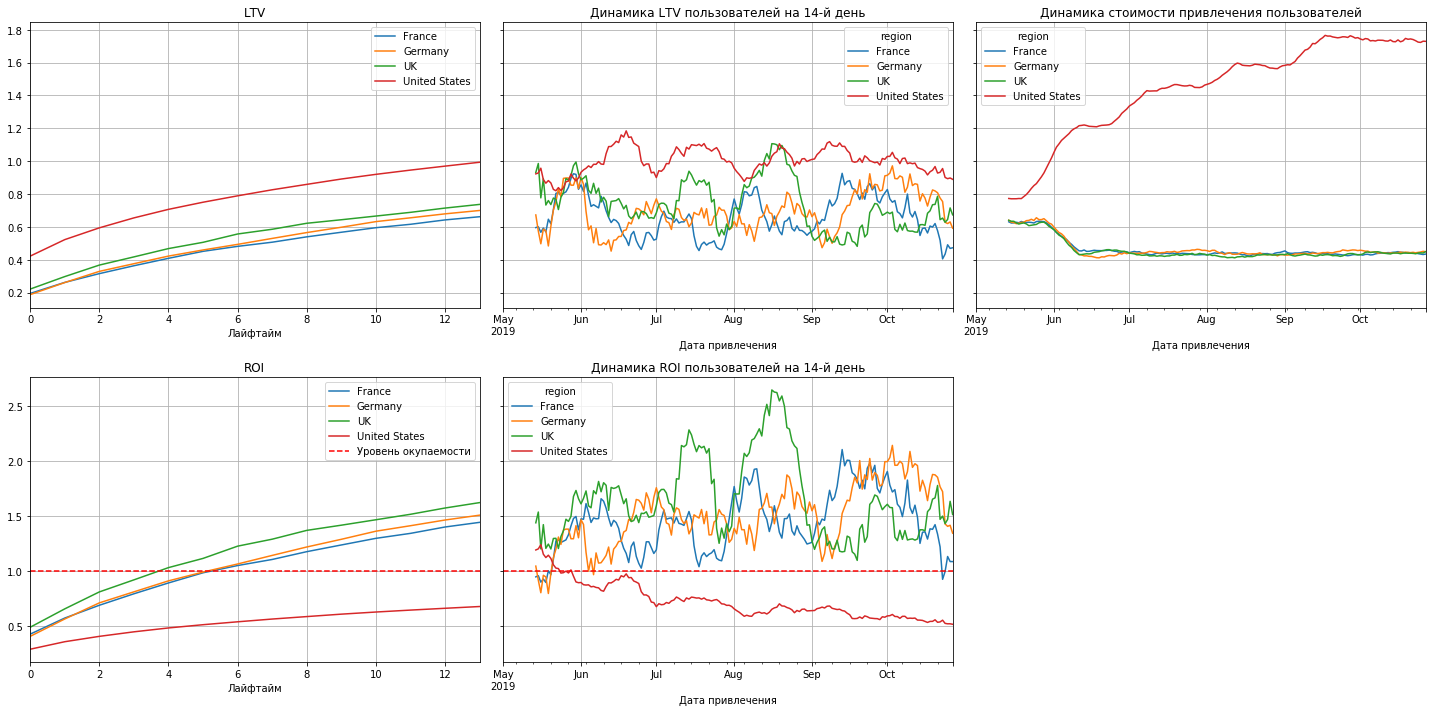

In [36]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вот что говорят графики разбивки по странам:
1) Реклама не окупается только в США.  
2) Стоимость привлечения пользователей США резко возрасла.  
3) LTV всё так же подвержен сезонности, но стабилен.  
4) Лучше всего окупается Германия и Великобритания.  
5) Нужно внимательно присмотреться к США  

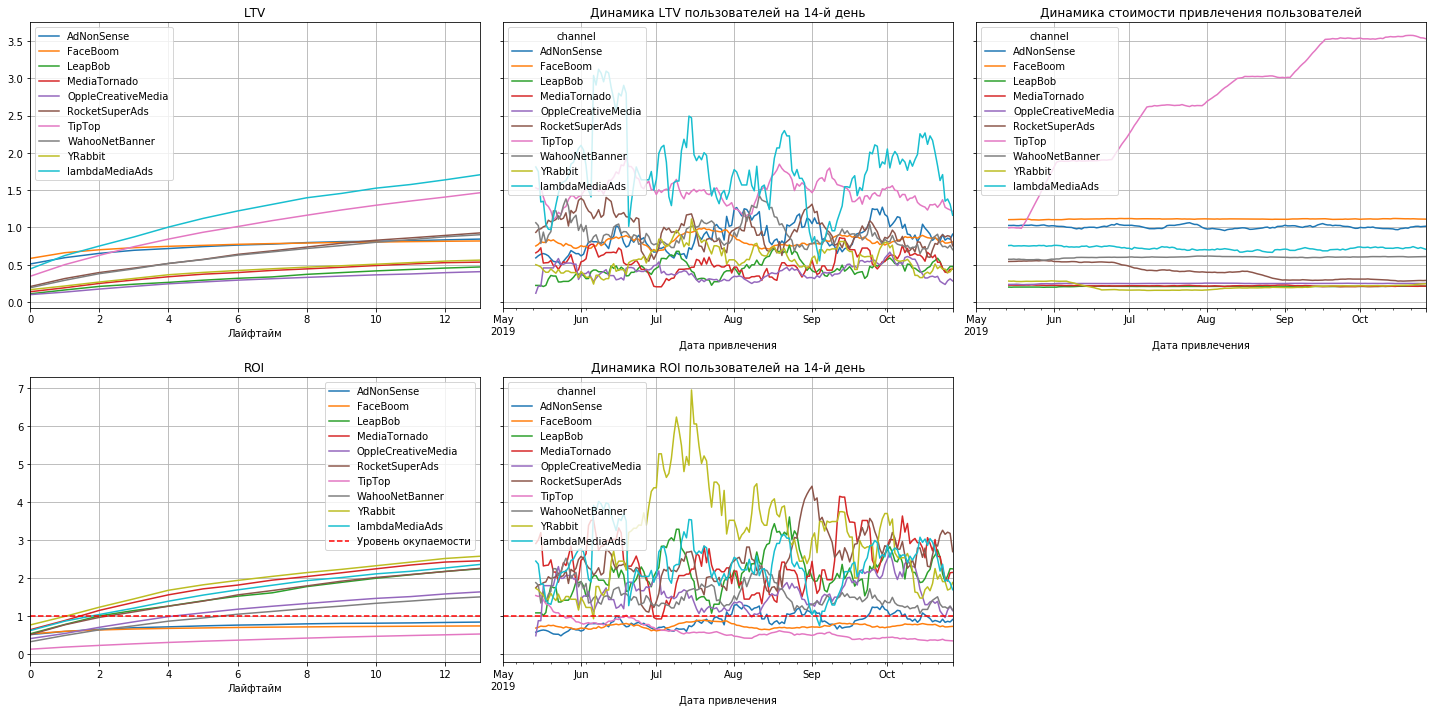

In [37]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

Вот что говорят графики разбивки по каналам привлечения:

1) Реклама не окупается только от FaceBOOM и TipTop и LeapBOB.  
2) Стоимость привлечения пользователей от  TipTop резко возрасла, отсюда и неокупаемость, причем когда затраты на рекламу TipTop были на майском уровне, этот канал окупался.  
3) LTV всё так же подвержен сезонности, но стабилен.  
4) Лучше всего окупается Германия и Великобритания.  
5) Выделяем TipTop как проблемный канал, который сильно портит общую статистику.  

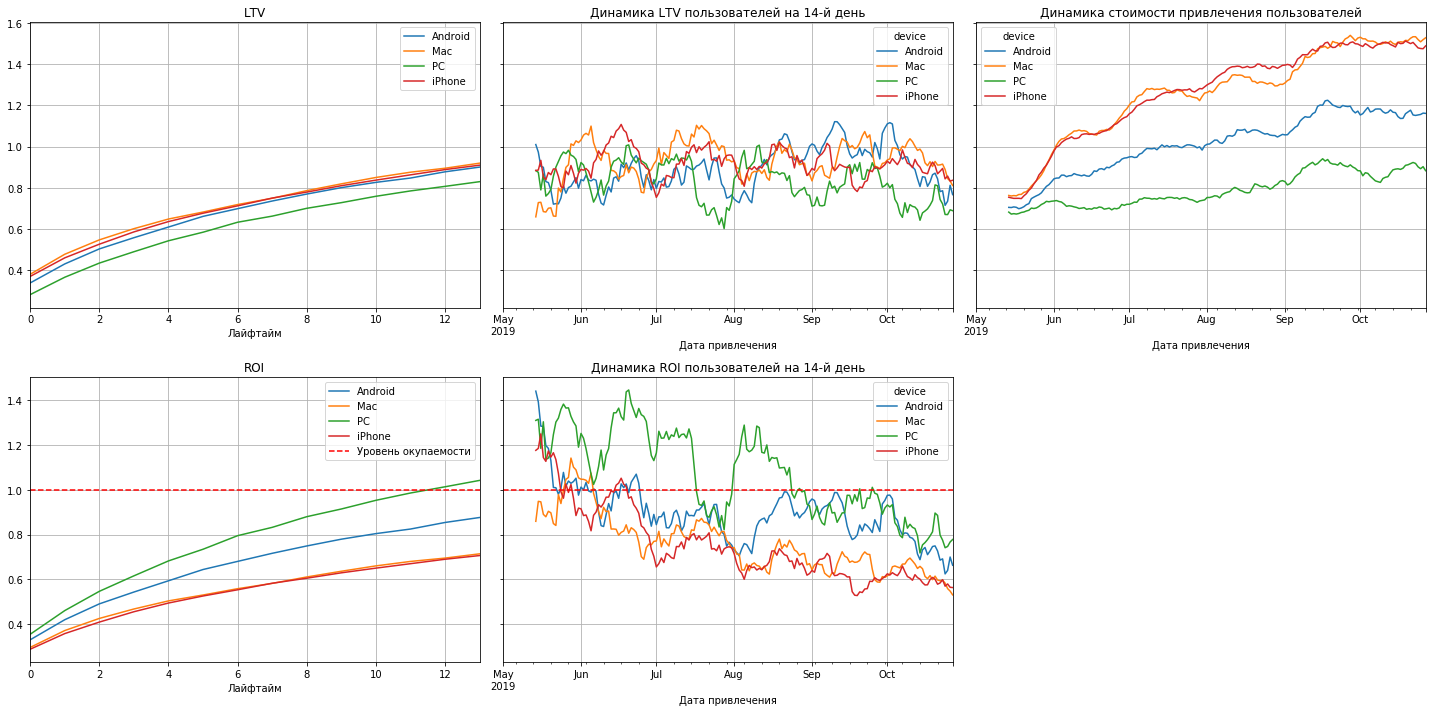

In [38]:
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    prof, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

<b>Новый вывод:</b> По графикам можно сделать такие выводы:    
1) Реклама  окупается только у пользователей PC.  
2) Стоимость привлечения пользователей Iphone и Mac  возрасла сильнее остальных, отсюда возможна и неокупаемость.
3) LTV всё так же подвержен сезонности, но стабилен.   
4) Выделяем Iphone, Mac, Android.   

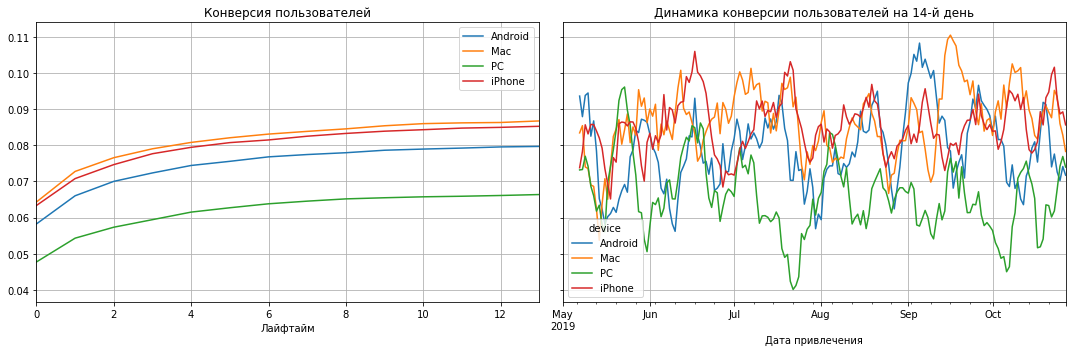

In [39]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    prof, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

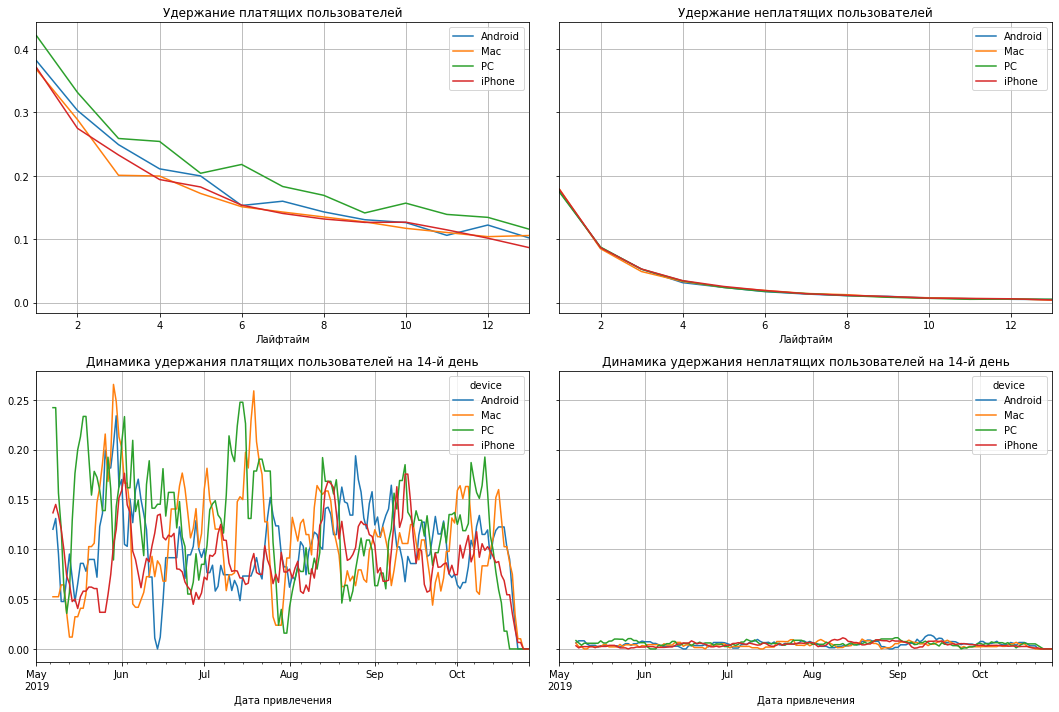

In [40]:
retention_raw, retention_grouped, retention_history = get_retention(
   prof, users, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

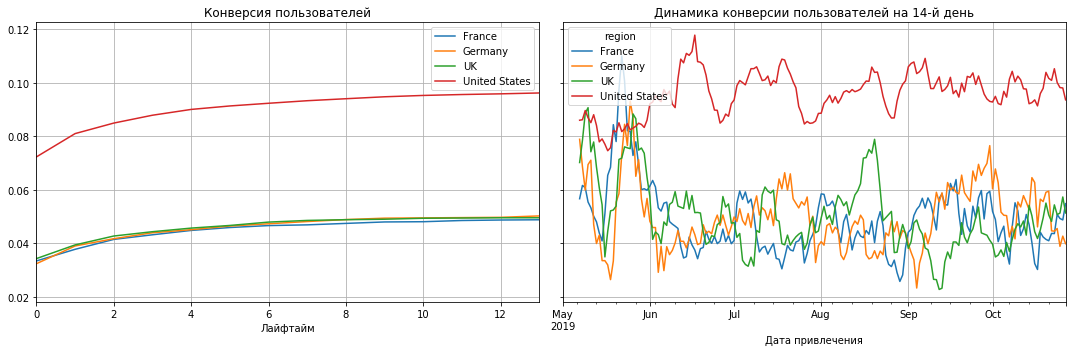

In [41]:
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    prof, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

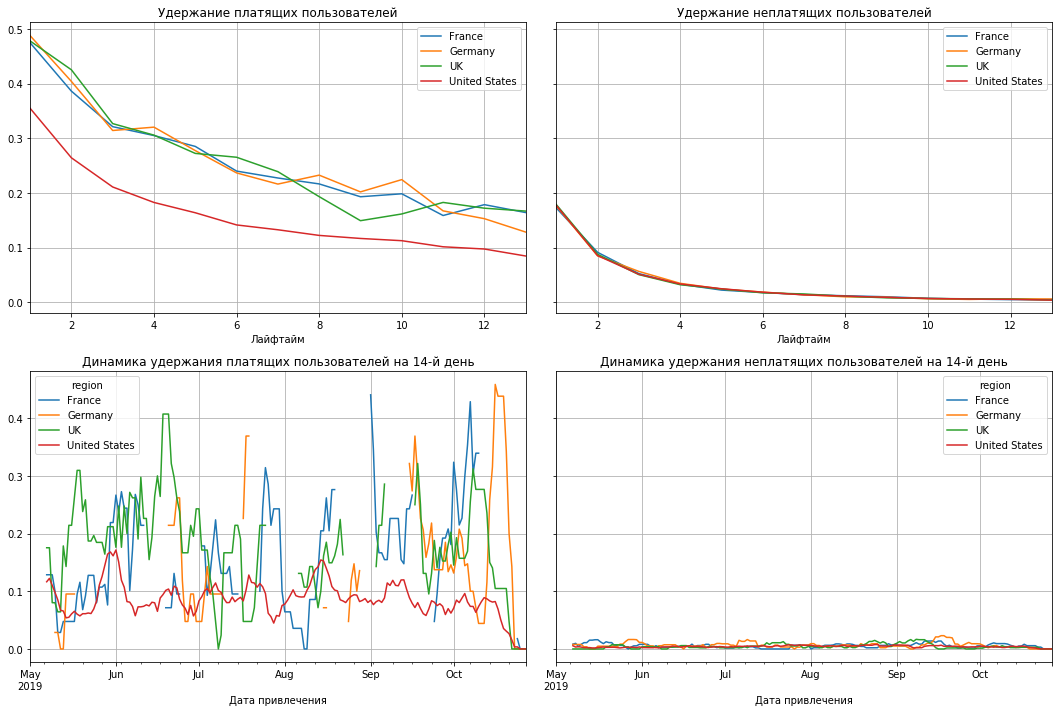

In [42]:
retention_raw, retention_grouped, retention_history = get_retention(
   prof, users, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

А вот и ответ: Хоть пользователей из США большинство, они стабтльно плохо удерживаются!

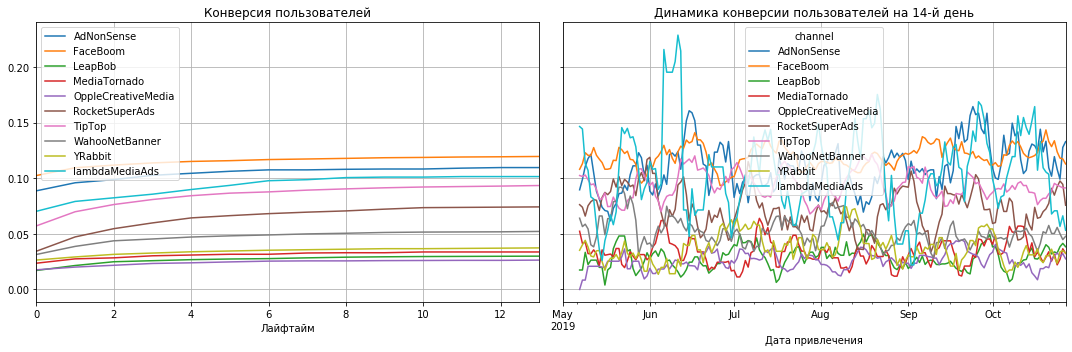

In [43]:
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    prof, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

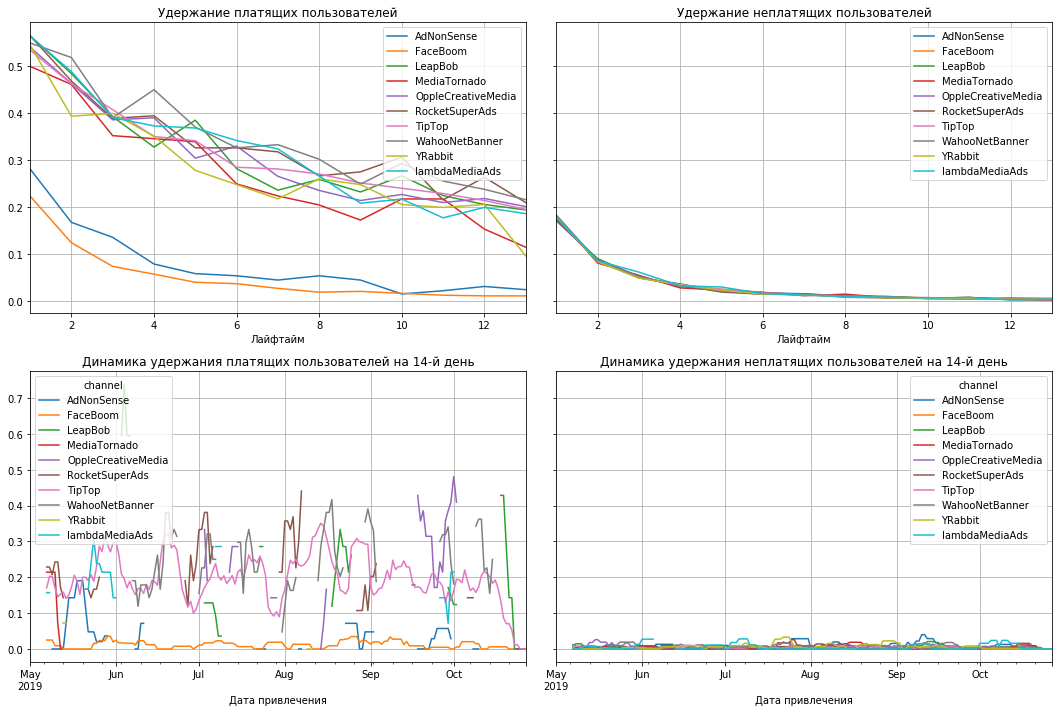

In [45]:
retention_raw, retention_grouped, retention_history = get_retention(
   prof, users, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

### Динамика удержания и конверсия пользователей из США

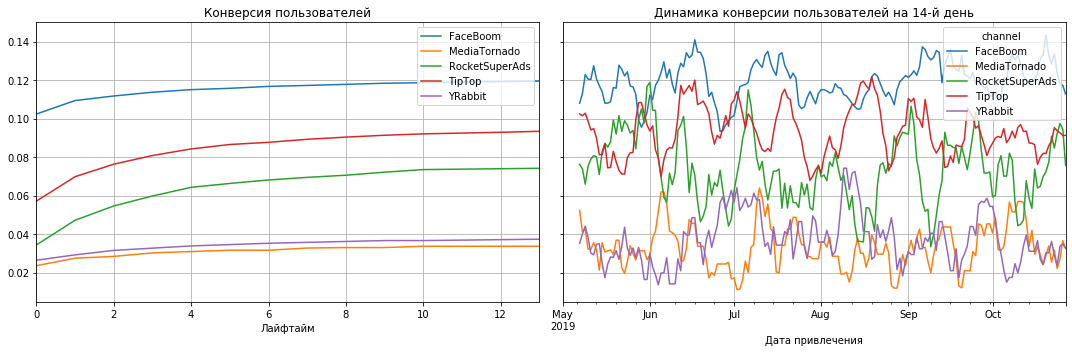

In [46]:
prof = prof.query('region == "United States"')
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    prof, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

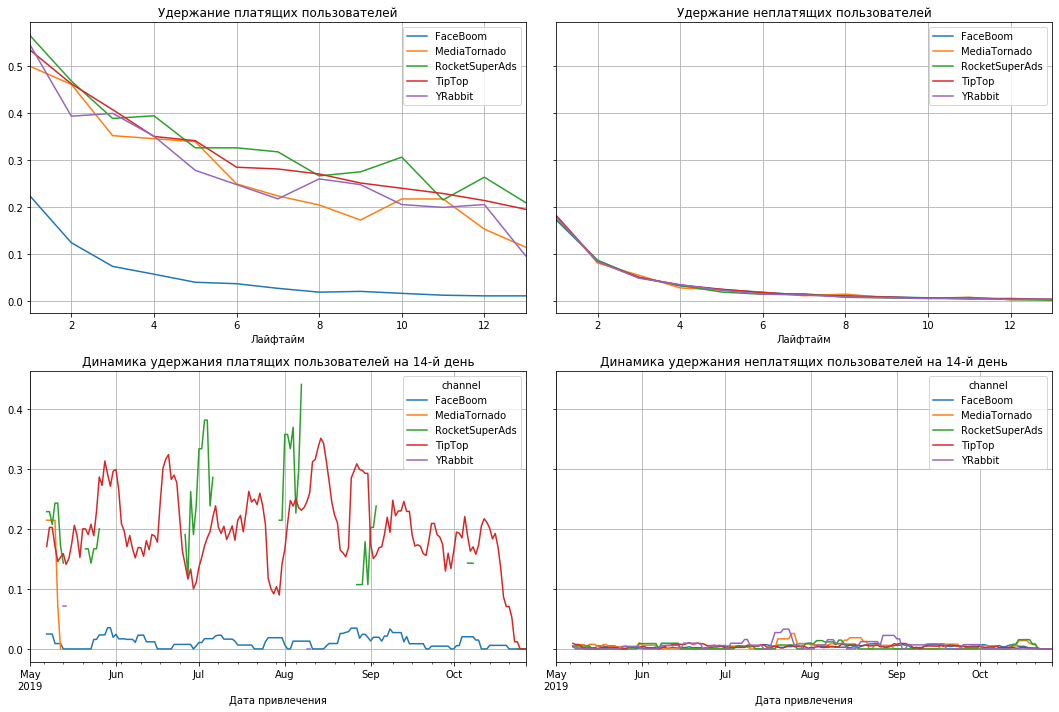

In [47]:
retention_raw, retention_grouped, retention_history = get_retention(
   prof, users, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days)

Соответственно и реклама Faceboom показывает себя с очень плохой стороны.

<b>Новый вывод:</b>    
1) Реклама Faceboom показала себя с отрицательной стороны, хоть она и приносит с собой много пользоватлей, но они совершенно не конвектируются в покупателей.  
2) Стоит присмотрется к рекламе TipTop и RocketSuperAds. Эти каналы показывают очень хоршую конверсию  

##  Вывод
Причины неэффективности привлечения пользователей:

1) Хоть пользователей из США большинство, они стабтльно плохо удерживаются!

2) Реклама Faceboom является основным источником привлечения пользователей из США не окупает себя!

Сформируем рекомендации для отдела маркетинга для повышения эффективности:
1) Сократить траты на рекламу Faceboom или поменять саму рекламу на Faceboom, так как пользователи переходят на сайт продукта, но не конвектируются в покупателей, возможно реклама на faceboom ориентирована не совсем на целевую аудиторию. 

2) Лучше проанализировать целевую аудиторию из США для улучшения конвертирования пользователей в покупателей 

## Дополненный Вывод
Причины неэффективности привлечения пользователей:  
1) Хоть пользователей из США большинство, они стабтльно плохо удерживаются!

2) Реклама Faceboom, ориентированная на пользователей из США, не окупает себя!

3) Реклама TipTop в целом показывает себя неплохо в параметрах касающихся конверсии и привлечении. 

Сформируем рекомендации для отдела маркетинга для повышения эффективности:  
1) Сократить траты на рекламу Faceboom или поменять саму рекламу на Faceboom, так как пользователи переходят на сайт продукта, но не конвектируются в покупателей, возможно реклама на faceboom ориентирована не совсем на целевую аудиторию.

2) Оптимизировать траты на TipTop и пересмотреть стратегию привлечения. Не стоит полностью отказывается от этого канала.

3) Обратить внимание на канал: RocketSuperAds. Он хорошо привлекает пользователей из США и коверитрует их в покупателей

4) Лучше проанализировать целевую аудиторию из США для улучшения конвертирования пользователей в покупателей 